### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 13,138459,5103,70494
Mar 14,145480,5426,72165
Mar 15,156421,5819,73917
Mar 16,172158,6652,78031
Mar 17,191914,7343,80347


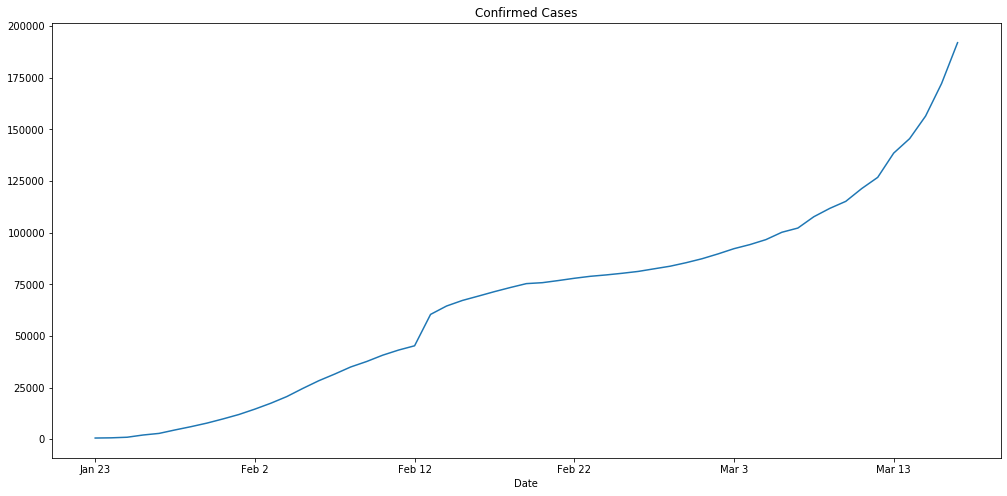

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

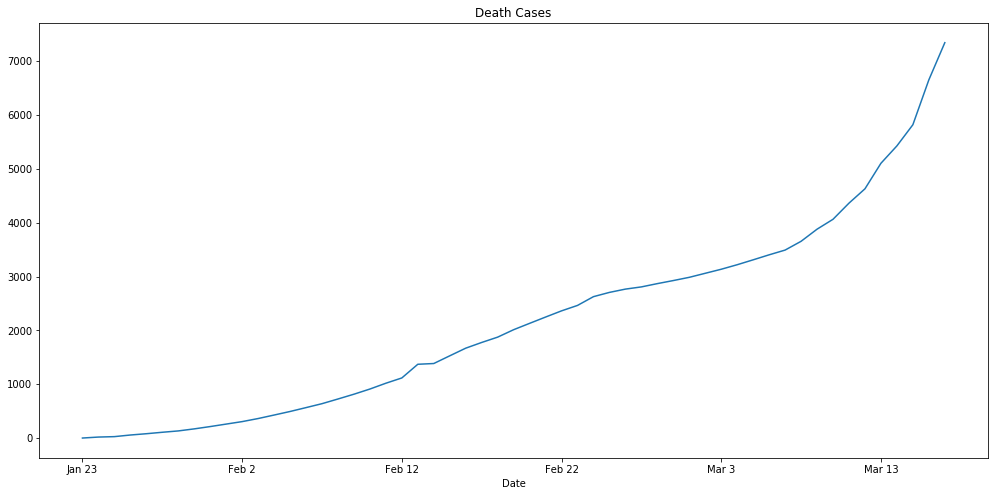

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

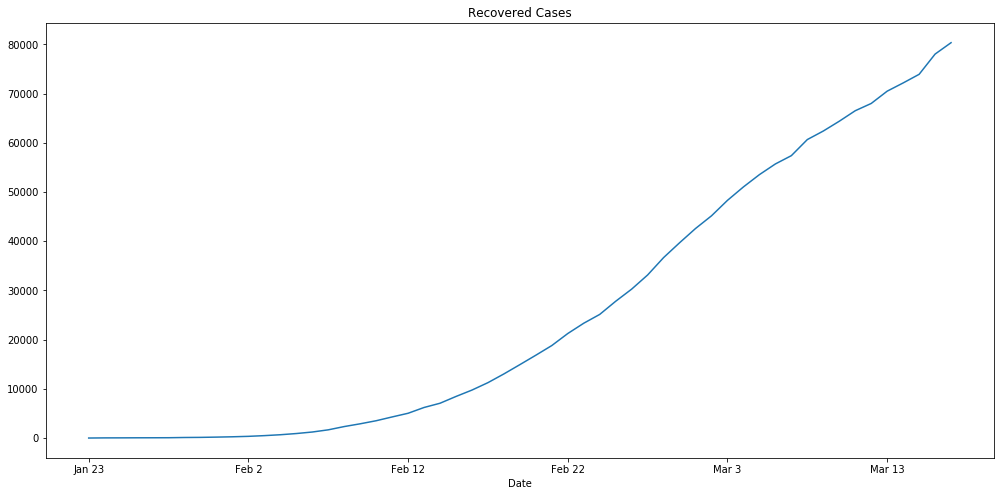

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

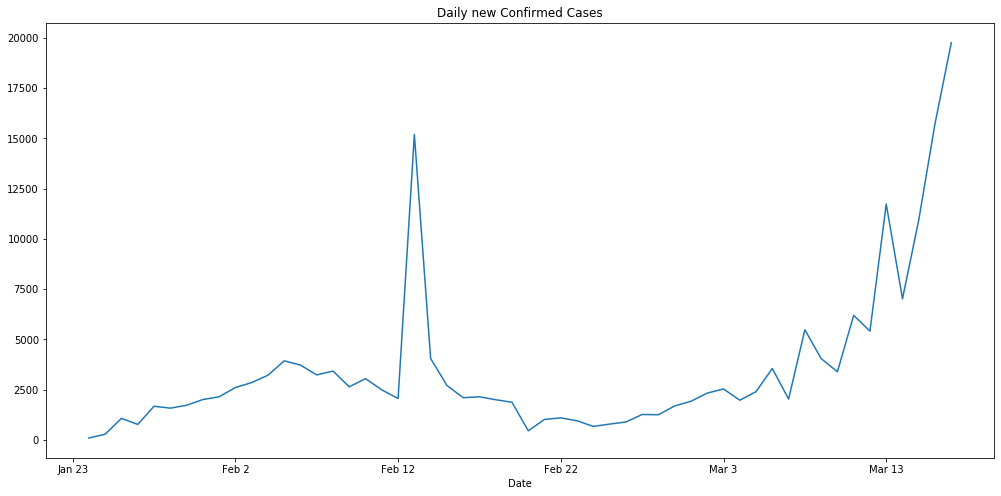

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

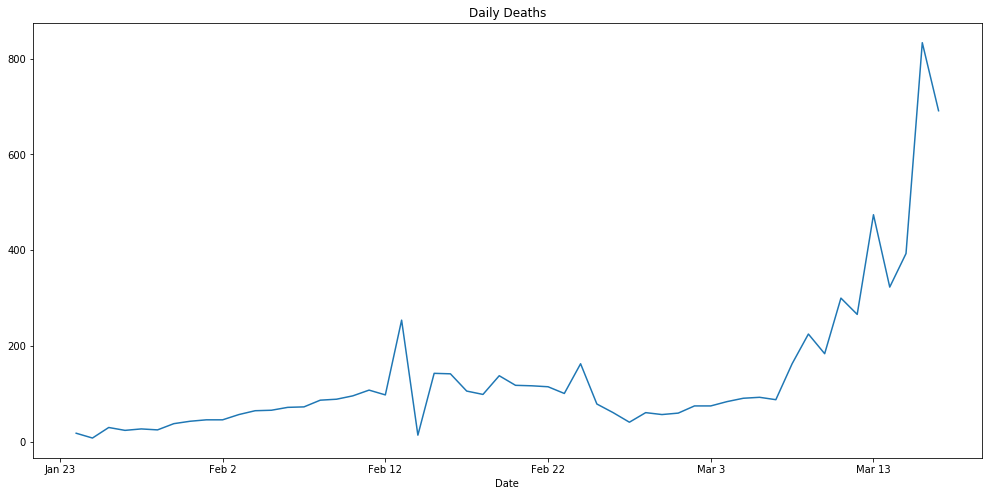

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

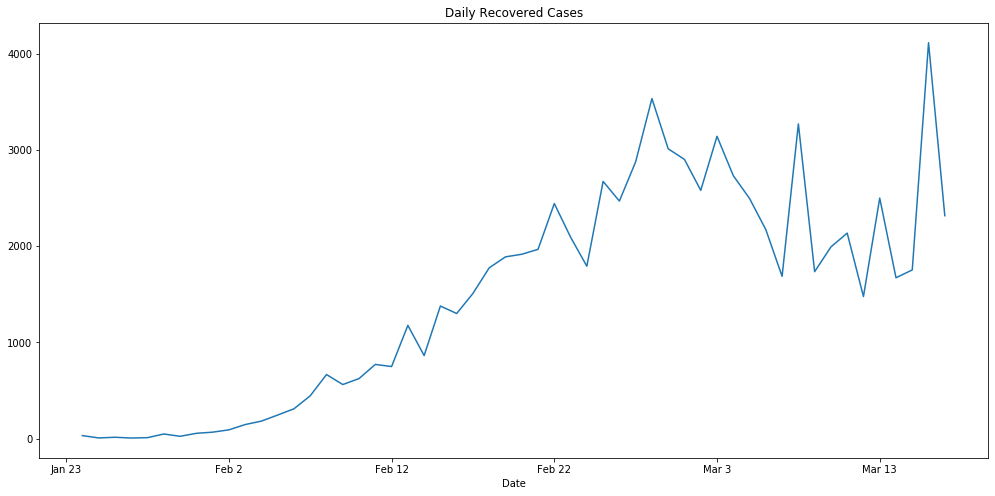

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=994.779, BIC=1006.601, Fit time=1.957 seconds
Fit ARIMA: order=(0, 2, 0); AIC=999.065, BIC=1003.005, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0); AIC=992.159, BIC=998.070, Fit time=0.369 seconds
Fit ARIMA: order=(0, 2, 1); AIC=991.086, BIC=996.997, Fit time=0.327 seconds
Fit ARIMA: order=(1, 2, 1); AIC=992.890, BIC=1000.772, Fit time=0.492 seconds
Fit ARIMA: order=(0, 2, 2); AIC=992.828, BIC=1000.710, Fit time=0.472 seconds
Fit ARIMA: order=(1, 2, 2); AIC=992.887, BIC=1002.739, Fit time=1.204 seconds
Total fit time: 4.875 seconds


In [15]:
confirmed_model.aic()

991.0864185034724

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-18 - 209222
2020-03-19 - 226850
2020-03-20 - 244796
2020-03-21 - 263062
2020-03-22 - 281646
2020-03-23 - 300549
2020-03-24 - 319770
2020-03-25 - 339311
2020-03-26 - 359170
2020-03-27 - 379349
2020-03-28 - 399846
2020-03-29 - 420662
2020-03-30 - 441797
2020-03-31 - 463250
2020-04-01 - 485023


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=617.567, BIC=629.389, Fit time=0.817 seconds
Fit ARIMA: order=(0, 2, 0); AIC=629.970, BIC=633.911, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0); AIC=621.396, BIC=627.306, Fit time=0.219 seconds
Fit ARIMA: order=(0, 2, 1); AIC=621.320, BIC=627.231, Fit time=0.206 seconds
Fit ARIMA: order=(1, 2, 2); AIC=607.887, BIC=617.738, Fit time=0.950 seconds
Fit ARIMA: order=(1, 2, 1); AIC=622.391, BIC=630.272, Fit time=0.339 seconds
Fit ARIMA: order=(1, 2, 3); AIC=609.876, BIC=621.698, Fit time=1.817 seconds
Fit ARIMA: order=(2, 2, 3); AIC=610.393, BIC=624.185, Fit time=2.497 seconds
Fit ARIMA: order=(0, 2, 2); AIC=618.410, BIC=626.291, Fit time=0.500 seconds
Total fit time: 7.387 seconds


In [20]:
deaths_model.aic()

607.8868294961435

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-18 - 8071
2020-03-19 - 8916
2020-03-20 - 9877
2020-03-21 - 10950
2020-03-22 - 12133
2020-03-23 - 13426
2020-03-24 - 14825
2020-03-25 - 16329
2020-03-26 - 17936
2020-03-27 - 19644
2020-03-28 - 21452
2020-03-29 - 23358
2020-03-30 - 25360
2020-03-31 - 27457
2020-04-01 - 29647


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=834.363, BIC=838.303, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=815.441, BIC=821.352, Fit time=0.264 seconds
Fit ARIMA: order=(0, 2, 1); AIC=813.089, BIC=819.000, Fit time=0.221 seconds
Fit ARIMA: order=(1, 2, 1); AIC=812.088, BIC=819.969, Fit time=0.387 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1); AIC=803.048, BIC=812.899, Fit time=0.748 seconds
Fit ARIMA: order=(2, 2, 0); AIC=806.849, BIC=814.730, Fit time=0.410 seconds
Fit ARIMA: order=(3, 2, 2); AIC=807.006, BIC=820.798, Fit time=1.283 seconds
Fit ARIMA: order=(3, 2, 1); AIC=804.968, BIC=816.789, Fit time=1.014 seconds
Total fit time: 4.469 seconds


In [25]:
recovered_model.aic()

803.0476141724146

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-18 - 83328
2020-03-19 - 87001
2020-03-20 - 89454
2020-03-21 - 93112
2020-03-22 - 96330
2020-03-23 - 99364
2020-03-24 - 103140
2020-03-25 - 106279
2020-03-26 - 109840
2020-03-27 - 113518
2020-03-28 - 116896
2020-03-29 - 120741
2020-03-30 - 124389
2020-03-31 - 128105
2020-04-01 - 132056
